In [632]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [591]:
df=pd.read_csv('database.csv')
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [592]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


**Cleaning Data**

In [593]:
# identifying columns with NaN or Null values
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [594]:
# Dropping columns with NaN or Null Values
columns_to_drop=['Magnitude Type','Magnitude Error','Depth Error','Depth Seismic Stations','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square']
df=df.drop(columns=columns_to_drop)

In [595]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [596]:
df.count()

Date                23412
Time                23412
Latitude            23412
Longitude           23412
Type                23412
Depth               23412
Magnitude           23412
ID                  23412
Source              23412
Location Source     23412
Magnitude Source    23412
Status              23412
dtype: int64

In [597]:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [598]:
# Creating a new dataframe with the most important columns for our project
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


**Exploring data**

In [599]:
import seaborn as sns
import matplotlib.pyplot as plt

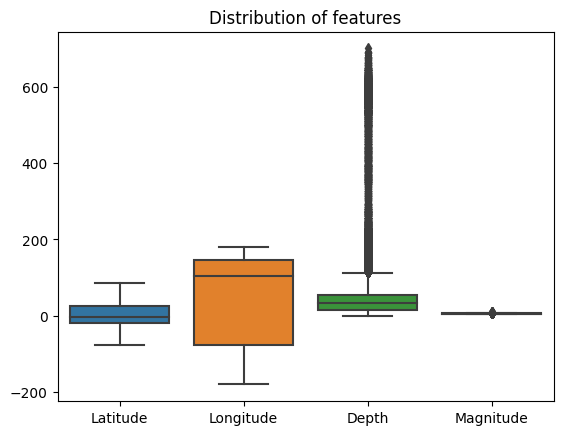

In [600]:
sns.boxplot(df)
plt.title("Distribution of features")
plt.show()

C:\Users\Javier Melo\AppData\Local\Temp\ipykernel_19376\1619417070.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


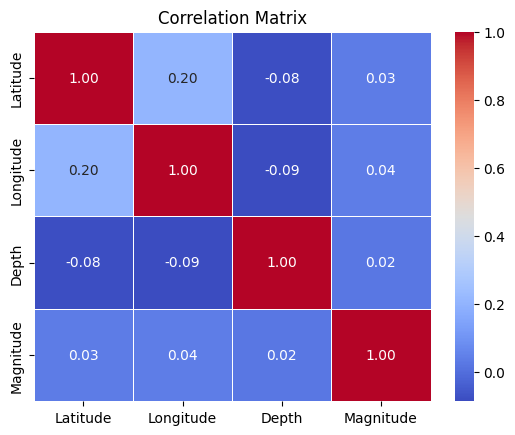

In [601]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [602]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

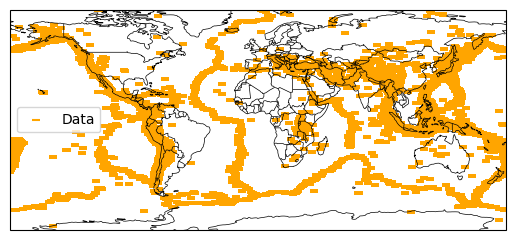

In [603]:
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': projection})

ax.set_extent([-180, 180, -80, 80], crs=projection)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()

longitudes = np.array(longitudes)
latitudes = np.array(latitudes)

xy = projection.transform_points(ccrs.Geodetic(), longitudes, latitudes)
x, y = xy[:, 0], xy[:, 1]

ax.scatter(x, y, marker='_', color='orange', label='Data')
plt.legend()
plt.show()

**Feature Engineering**

In [604]:
import datetime
import time

In [605]:
#Transforming Date feature in a valid format
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y', errors='coerce')
df.head(5)

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,1965-01-02,13:44:18,19.246,145.616,131.6,6.0
1,1965-01-04,11:29:49,1.863,127.352,80.0,5.8
2,1965-01-05,18:05:58,-20.579,-173.972,20.0,6.2
3,1965-01-08,18:49:43,-59.076,-23.557,15.0,5.8
4,1965-01-09,13:32:50,11.938,126.427,15.0,5.8


In [606]:
df['Date'].describe

<bound method NDFrame.describe of 0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: Date, Length: 23412, dtype: datetime64[ns]>

In [608]:
# Validing null values into Date
df['Date'].isnull().sum()

3

In [611]:
# Deleting null values into Date feature
df = df.dropna(subset=['Date'])

In [612]:
df['Date'].isnull().sum()

0

In [613]:
# Splitting Date column among 3 new features (Year, Month, Day)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head(5)

,Date,Time,Latitude,Longitude,Depth,Magnitude,Year,Month,Day
0,1965-01-02,13:44:18,19.246,145.616,131.6,6.0,1965,1,2
1,1965-01-04,11:29:49,1.863,127.352,80.0,5.8,1965,1,4
2,1965-01-05,18:05:58,-20.579,-173.972,20.0,6.2,1965,1,5
3,1965-01-08,18:49:43,-59.076,-23.557,15.0,5.8,1965,1,8
4,1965-01-09,13:32:50,11.938,126.427,15.0,5.8,1965,1,9


**Model Selection**

First model --- Multiple linear regression

In [650]:
# Splitting data
X_depth = df[['Year','Month','Day','Latitude', 'Longitude']]
y_depth = df['Depth']
X_magnitude = df[['Year','Month','Day','Latitude', 'Longitude']]
y_magnitude=df['Magnitude']
X_train_depth, X_test_depth, y_train_depth, y_test_depth = train_test_split(X_depth, y_depth, test_size=0.2, random_state=42)
X_train_magnitude, X_test_magnitude, y_train_magnitude, y_test_magnitude = train_test_split(X_magnitude, y_magnitude, test_size=0.2, random_state=42)

In [651]:
# Fitting the model for Depth
model_depth = LinearRegression()
model_depth.fit(X_train_depth, y_train_depth)

LinearRegression()

In [652]:
predictions_depth = model_depth.predict(X_test_depth)

In [653]:
mse_depth = mean_squared_error(y_test_depth, predictions_depth)
r2 = r2_score(y_test_depth, predictions_depth)
print(f'Mean Squared Error (Depth): {mse_depth}')
print(f'R2_Score: {r2}')

Mean Squared Error (Depth): 14903.808357396909
R2_Score: 0.015471561741784212


In [639]:
# Fitting the model for Magnitude
model_magnitude = LinearRegression()
model_magnitude.fit(X_train_magnitude, y_train_magnitude)

LinearRegression()

In [640]:
predictions_magnitude = model_magnitude.predict(X_test_magnitude)

In [641]:
mse_magnitude = mean_squared_error(y_test_magnitude, predictions_magnitude)
print(f'Mean Squared Error (Magnitude): {mse_magnitude}')
r2 = r2_score(y_test_magnitude, predictions_magnitude)
print(f'R2_Score: {r2}')

Mean Squared Error (Magnitude): 0.1856012140783156
R2_Score: 0.0017727368988620373


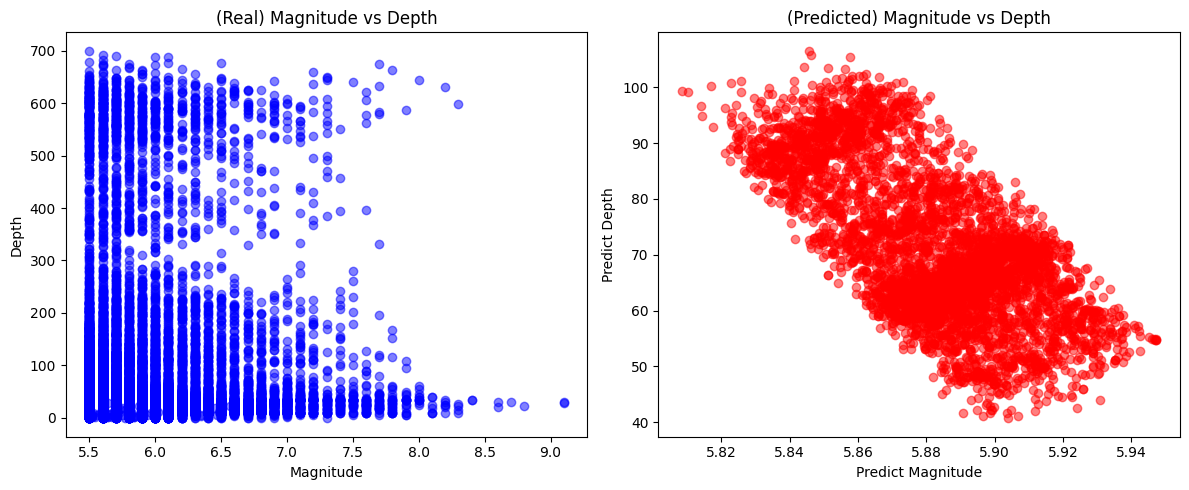

In [669]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graphing real values
ax1.scatter(y_magnitude, y_depth, alpha=0.5, color='blue')
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Depth')
ax1.set_title('(Real) Magnitude vs Depth')

# Graphing predict values
ax2.scatter(predictions_magnitude, predictions_depth, alpha=0.5, color='red')
ax2.set_xlabel('Predict Magnitude')
ax2.set_ylabel('Predict Depth')
ax2.set_title('(Predicted) Magnitude vs Depth')

plt.tight_layout()
plt.show()

**Model 2 ANN**

In [664]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [666]:
# Splitting data
X_depth_train, X_depth_test, y_depth_train, y_depth_test = train_test_split(X_depth, y_depth, test_size=0.2, random_state=42)
X_magnitude_train, X_magnitude_test, y_magnitude_train, y_magnitude_test = train_test_split(X_magnitude, y_magnitude, test_size=0.2, random_state=42)


In [670]:
# Standardizing data
scaler = StandardScaler()
X_depth_train_scaled = scaler.fit_transform(X_depth_train)
X_depth_test_scaled = scaler.transform(X_depth_test)

X_magnitude_train_scaled = scaler.fit_transform(X_magnitude_train)
X_magnitude_test_scaled = scaler.transform(X_magnitude_test)

In [671]:
# Defining the ANN model
depth_model = Sequential([
    Dense(64, activation='relu', input_dim=X_depth_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [672]:
magnitude_model = Sequential([
    Dense(64, activation='relu', input_dim=X_magnitude_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [673]:
depth_model.compile(optimizer='adam', loss='mean_squared_error')
magnitude_model.compile(optimizer='adam', loss='mean_squared_error')

In [674]:
depth_model.fit(X_depth_train_scaled, y_depth_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)
magnitude_model.fit(X_magnitude_train_scaled, y_magnitude_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

c:\Users\Javier Melo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
469/469 - 4s - loss: 16165.6865 - val_loss: 14986.5908 - 4s/epoch - 8ms/step
Epoch 2/50
469/469 - 2s - loss: 14604.7344 - val_loss: 14846.5732 - 2s/epoch - 4ms/step
Epoch 3/50
469/469 - 2s - loss: 14470.9727 - val_loss: 14722.0049 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 14400.1211 - val_loss: 14646.6758 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 14340.7002 - val_loss: 14581.3574 - 2s/epoch - 4ms/step
Epoch 6/50
469/469 - 2s - loss: 14264.5010 - val_loss: 14530.4590 - 2s/epoch - 4ms/step
Epoch 7/50
469/469 - 2s - loss: 14210.3359 - val_loss: 14451.5801 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 14107.9014 - val_loss: 14303.3037 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 2s - loss: 14067.8193 - val_loss: 14236.0273 - 2s/epoch - 4ms/step
Epoch 10/50
469/469 - 2s - loss: 13985.2383 - val_loss: 14184.2041 - 2s/epoch - 4ms/step
Epoch 11/50
469/469 - 2s - loss: 13943.7012 - val_loss: 14139.2275 - 2s/epoch - 4ms/step
Epoch 12/50
469/469 - 2s - los

In [675]:
y_depth_pred = depth_model.predict(X_depth_test_scaled)
y_magnitude_pred = magnitude_model.predict(X_magnitude_test_scaled)

147/147 [==============================] - 0s 3ms/step


In [682]:
mse_depth = mean_squared_error(y_depth_test, y_depth_pred)
r2_depth = r2_score(y_depth_test, y_depth_pred)
print("Depth Model:")
print(f"Mean Squared Error: {mse_depth}")
print(f"R-squared: {r2_depth}")

Depth Model:
Mean Squared Error: 13049.34133890039
R-squared: 0.13797552004151603


In [683]:
mse_magnitude = mean_squared_error(y_magnitude_test, y_magnitude_pred)
r2_magnitude = r2_score(y_magnitude_test, y_magnitude_pred)
print("\nMagnitude Model:")
print(f"Mean Squared Error: {mse_magnitude}")
print(f"R-squared: {r2_magnitude}")


Magnitude Model:
Mean Squared Error: 0.18418228901932673
R-squared: 0.009404204641214164


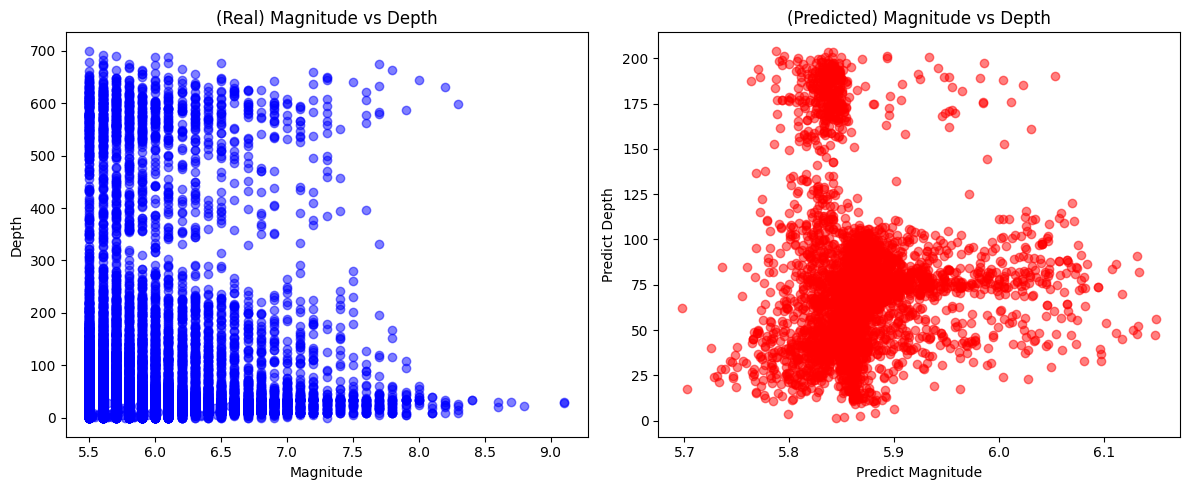

In [700]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Graphing real values
# ax3.set_xlim(xmin=5.5, xmax=6.2)
# ax3.set_ylim(ymin=0, ymax=500)
ax3.scatter(y_magnitude, y_depth, alpha=0.5, color='blue')
ax3.set_xlabel('Magnitude')
ax3.set_ylabel('Depth')
ax3.set_title('(Real) Magnitude vs Depth')

# Graphing predict values
ax4.scatter(y_magnitude_pred, y_depth_pred, alpha=0.5, color='red')
ax4.set_xlabel('Predict Magnitude')
ax4.set_ylabel('Predict Depth')
ax4.set_title('(Predicted) Magnitude vs Depth')

#ax4.set_xlim(xmin=5.5, xmax=9)
#ax4.set_ylim(ymin=0, ymax=700)

plt.tight_layout()
plt.show()